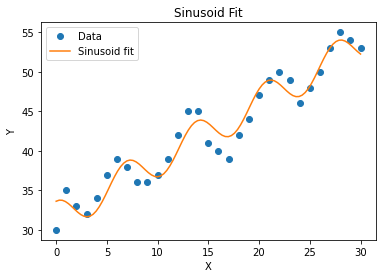

Optimized parameters: [ 2.17177157  0.90932511  0.73248788 31.45276293]


In [11]:
# My GitHub:
# https://github.com/n15lind

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Define the model function
def lserror (c, x, y):
    return np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2)/32)

# Define the data
X_data = np.arange(0,31)
Y_data = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Set initial guesses for parameters
c0 = np.array([20, np.pi/6, 1, 31])

# Perform Optimization
res = opt.minimize(lserror, c0, args=(X_data, Y_data), method='Nelder-Mead')

# Find the optimized parameters
c = res.x

# Generate the curve fit data
X_fit = np.linspace(0, 30, 100)
Y_fit = c[0]*np.cos(c[1]*X_fit)+c[2]*X_fit+c[3]

# Plot the data and the curve fit
plt.plot(X_data, Y_data, 'o', label='Data')
plt.plot(X_fit, Y_fit, label='Sinusoid fit')
plt.title('Sinusoid Fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("Optimized parameters:", c)


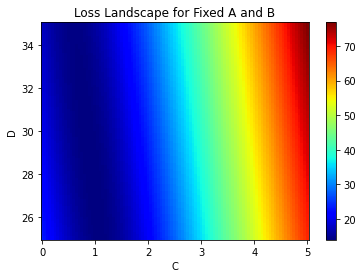

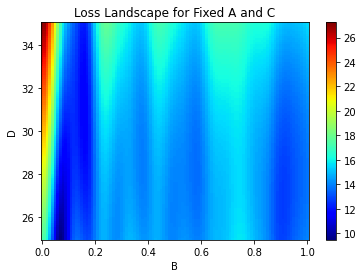

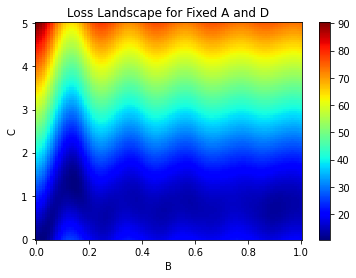

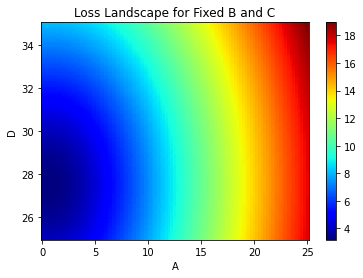

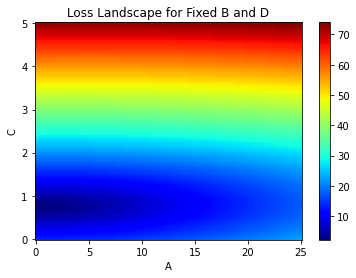

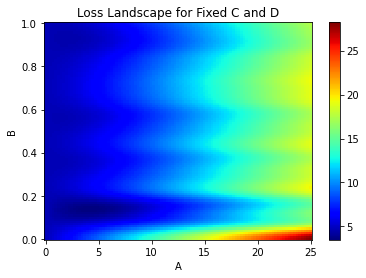

In [72]:
# Set ranges for parameter sweeping
A_range = np.linspace(0, 25, 101)
B_range = np.linspace(0, 1, 101)
C_range = np.linspace(0, 5, 101)
D_range = np.linspace(25, 35, 101)



# ***** FIXED A AND B *****

# Create a meshgrid of parameter values
Xab, Yab = np.meshgrid(C_range, D_range)

# Initialize the loss landscape
Zab = np.zeros_like(Xab)

# Fix A and B parameters
A = c0[0]
B = c0[1]

# Sweep through C and D parameters
for i in range(Xab.shape[0]):
    for j in range(Xab.shape[1]):
        C = Xab[i,j]
        D = Yab[i,j]
        c = np.array([A, B, C, D])
        Zab[i,j] = lserror(c, X_data, Y_data)

# Plot the loss landscape
plt.pcolor(Xab, Yab, Zab, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel('C')
plt.ylabel('D')
plt.title('Loss Landscape for Fixed A and B')
plt.show()



# ***** FIXED A AND C *****

# Create a meshgrid of parameter values
Xac, Yac = np.meshgrid(B_range, D_range)

# Initialize the loss landscape
Zac = np.zeros_like(Xac)

# Fix A and C parameters
A = c0[0]
C = c0[2]

# Sweep through B and D parameters
for i in range(Xac.shape[0]):
    for j in range(Xac.shape[1]):
        B = Xac[i,j]
        D = Yac[i,j]
        c = np.array([A, B, C, D])
        Zac[i,j] = lserror(c, X_data, Y_data)

# Plot the loss landscape
plt.pcolor(Xac, Yac, Zac, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel('B')
plt.ylabel('D')
plt.title('Loss Landscape for Fixed A and C')
plt.show()



# ***** FIXED A AND D *****

# Create a meshgrid of parameter values
Xad, Yad = np.meshgrid(B_range, C_range)

# Initialize the loss landscape
Zad = np.zeros_like(Xad)

# Fix A and D parameters
A = c0[0]
D = c0[3]

# Sweep through B and C parameters
for i in range(Xad.shape[0]):
    for j in range(Xad.shape[1]):
        B = Xad[i,j]
        C = Yad[i,j]
        c = np.array([A, B, C, D])
        Zad[i,j] = lserror(c, X_data, Y_data)

# Plot the loss landscape
plt.pcolor(Xad, Yad, Zad, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel('B')
plt.ylabel('C')
plt.title('Loss Landscape for Fixed A and D')
plt.show()



# ***** FIXED B AND C *****

# Create a meshgrid of parameter values
Xbc, Ybc = np.meshgrid(A_range, D_range)

# Initialize the loss landscape
Zbc = np.zeros_like(Xbc)

# Fix B and C parameters
B = c0[1]
C = c0[2]

# Sweep through A and D parameters
for i in range(Xbc.shape[0]):
    for j in range(Xbc.shape[1]):
        A = Xbc[i,j]
        D = Ybc[i,j]
        c = np.array([A, B, C, D])
        Zbc[i,j] = lserror(c, X_data, Y_data)

# Plot the loss landscape
plt.pcolor(Xbc, Ybc, Zbc, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel('A')
plt.ylabel('D')
plt.title('Loss Landscape for Fixed B and C')
plt.show()



# ***** FIXED B AND D *****

# Create a meshgrid of parameter values
Xbd, Ybd = np.meshgrid(A_range, C_range)

# Initialize the loss landscape
Zbd = np.zeros_like(Xbd)

# Fix B and D parameters
B = c0[1]
D = c0[3]

# Sweep through A and C parameters
for i in range(Xbd.shape[0]):
    for j in range(Xbd.shape[1]):
        A = Xbd[i,j]
        C = Ybd[i,j]
        c = np.array([A, B, C, D])
        Zbd[i,j] = lserror(c, X_data, Y_data)

# Plot the loss landscape
plt.pcolor(Xbd, Ybd, Zbd, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel('A')
plt.ylabel('C')
plt.title('Loss Landscape for Fixed B and D')
plt.show()



# ***** FIXED C AND D *****

# Create a meshgrid of parameter values
Xcd, Ycd = np.meshgrid(A_range, B_range)

# Initialize the loss landscape
Zcd = np.zeros_like(Xcd)

# Fix C and D parameters
C = c0[2]
D = c0[3]

# Sweep through A and B parameters
for i in range(Xcd.shape[0]):
    for j in range(Xcd.shape[1]):
        A = Xcd[i,j]
        B = Ycd[i,j]
        c = np.array([A, B, C, D])
        Zcd[i,j] = lserror(c, X_data, Y_data)

# Plot the loss landscape
plt.pcolor(Xcd, Ycd, Zcd, cmap='jet', shading='auto')
plt.colorbar()
plt.xlabel('A')
plt.ylabel('B')
plt.title('Loss Landscape for Fixed C and D')
plt.show()

C:\Users\NielG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


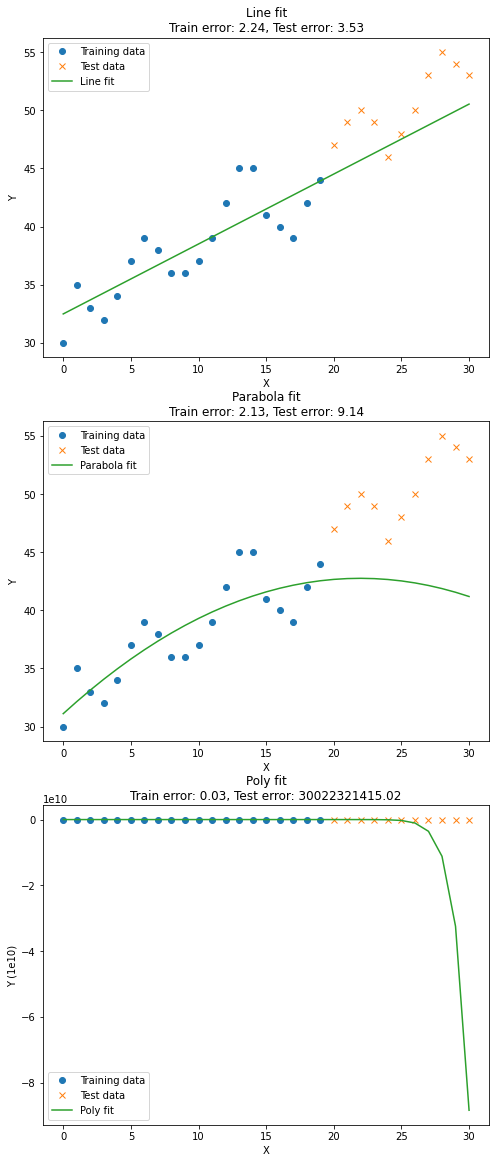

In [92]:
# Split the data into training and test data
X_train = X_data[:20]
Y_train = Y_data[:20]
X_test = X_data[20:]
Y_test = Y_data[20:]

# Fit a line to the training data
line_coeffs = np.polyfit(X_train, Y_train, 1)
line_fit = np.poly1d(line_coeffs)

# Compute the least square error for the line fit
line_lserror_train = np.sqrt(np.sum((line_fit(X_train) - Y_train)**2)/20)
line_lserror_test = np.sqrt(np.sum((line_fit(X_test) - Y_test)**2)/10)

# Fit a parabola to the training data
parabola_coeffs = np.polyfit(X_train, Y_train, 2)
parabola_fit = np.poly1d(parabola_coeffs)

# Compute the least square error for the parabola fit
parabola_lserror_train = np.sqrt(np.sum((parabola_fit(X_train) - Y_train)**2)/20)
parabola_lserror_test = np.sqrt(np.sum((parabola_fit(X_test) - Y_test)**2)/10)

# Fit a 19th degree polynomial to the training data
poly_coeffs = np.polyfit(X_train, Y_train, 19)
poly_fit = np.poly1d(poly_coeffs)

# Compute the least square error for the 19th degree polynomial fit
poly_lserror_train = np.sqrt(np.sum((poly_fit(X_train) - Y_train)**2)/20)
poly_lserror_test = np.sqrt(np.sum((poly_fit(X_test) - Y_test)**2)/10)

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(8, 20))

# Plot the line fit
axs[0].plot(X_train, Y_train, 'o', label='Training data')
axs[0].plot(X_test, Y_test, 'x', label='Test data')
axs[0].plot(X_data, line_fit(X_data), label='Line fit')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Line fit\nTrain error: {line_lserror_train:.2f}, Test error: {line_lserror_test:.2f}')
axs[0].legend()

# Plot the parabola fit
axs[1].plot(X_train, Y_train, 'o', label='Training data')
axs[1].plot(X_test, Y_test, 'x', label='Test data')
axs[1].plot(X_data, parabola_fit(X_data), label='Parabola fit')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Parabola fit\nTrain error: {parabola_lserror_train:.2f}, Test error: {parabola_lserror_test:.2f}')
axs[1].legend()

# Plot the line fit
axs[2].plot(X_train, Y_train, 'o', label='Training data')
axs[2].plot(X_test, Y_test, 'x', label='Test data')
axs[2].plot(X_data, poly_fit(X_data), label='Poly fit')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y (1e10)')
axs[2].set_title(f'Poly fit\nTrain error: {poly_lserror_train:.2f}, Test error: {poly_lserror_test:.2f}')
axs[2].legend()

C:\Users\NielG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


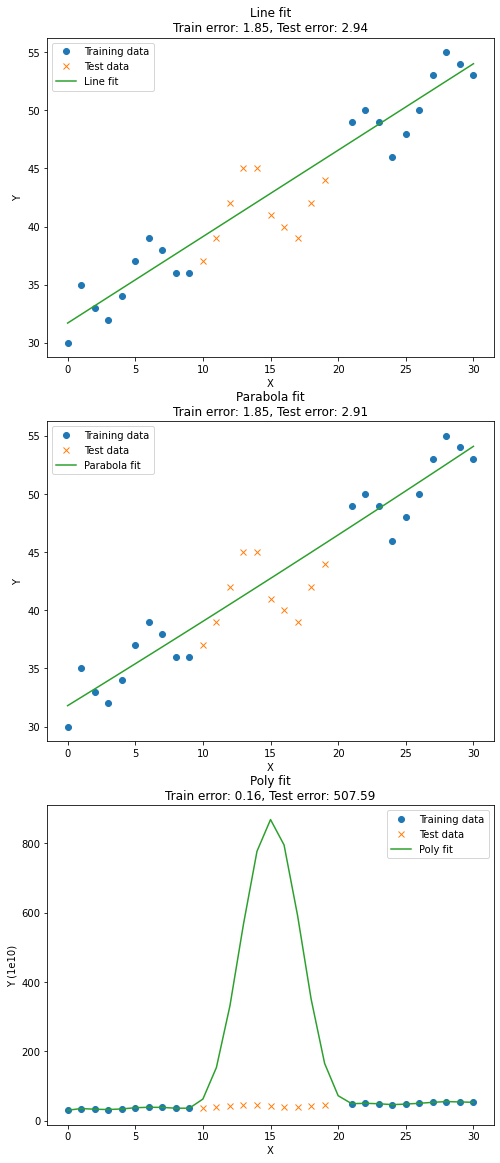

In [93]:
# Split the data into training and test data
X_train = np.concatenate([X_data[:10], X_data[-10:]])
Y_train = np.concatenate([Y_data[:10], Y_data[-10:]])
X_test = X_data[10:20]
Y_test = Y_data[10:20]

# Fit a line to the training data
line_coeffs = np.polyfit(X_train, Y_train, 1)
line_fit = np.poly1d(line_coeffs)

# Compute the least square error for the line fit
line_lserror_train = np.sqrt(np.sum((line_fit(X_train) - Y_train)**2)/20)
line_lserror_test = np.sqrt(np.sum((line_fit(X_test) - Y_test)**2)/10)

# Fit a parabola to the training data
parabola_coeffs = np.polyfit(X_train, Y_train, 2)
parabola_fit = np.poly1d(parabola_coeffs)

# Compute the least square error for the parabola fit
parabola_lserror_train = np.sqrt(np.sum((parabola_fit(X_train) - Y_train)**2)/20)
parabola_lserror_test = np.sqrt(np.sum((parabola_fit(X_test) - Y_test)**2)/10)

# Fit a 19th degree polynomial to the training data
poly_coeffs = np.polyfit(X_train, Y_train, 19)
poly_fit = np.poly1d(poly_coeffs)

# Compute the least square error for the 19th degree polynomial fit
poly_lserror_train = np.sqrt(np.sum((poly_fit(X_train) - Y_train)**2)/20)
poly_lserror_test = np.sqrt(np.sum((poly_fit(X_test) - Y_test)**2)/10)

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(8, 20))

# Plot the line fit
axs[0].plot(X_train, Y_train, 'o', label='Training data')
axs[0].plot(X_test, Y_test, 'x', label='Test data')
axs[0].plot(X_data, line_fit(X_data), label='Line fit')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Line fit\nTrain error: {line_lserror_train:.2f}, Test error: {line_lserror_test:.2f}')
axs[0].legend()

# Plot the parabola fit
axs[1].plot(X_train, Y_train, 'o', label='Training data')
axs[1].plot(X_test, Y_test, 'x', label='Test data')
axs[1].plot(X_data, parabola_fit(X_data), label='Parabola fit')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Parabola fit\nTrain error: {parabola_lserror_train:.2f}, Test error: {parabola_lserror_test:.2f}')
axs[1].legend()

# Plot the line fit
axs[2].plot(X_train, Y_train, 'o', label='Training data')
axs[2].plot(X_test, Y_test, 'x', label='Test data')
axs[2].plot(X_data, poly_fit(X_data), label='Poly fit')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y (1e10)')
axs[2].set_title(f'Poly fit\nTrain error: {poly_lserror_train:.2f}, Test error: {poly_lserror_test:.2f}')
axs[2].legend()